In [18]:
%pylab
from nugridpy import ppn
from nugridpy import ascii_table as at
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

Using matplotlib backend: nbAgg
Populating the interactive namespace from numpy and matplotlib


## Download the data 

In [19]:
Abu_C13_rf1=ppn.abu_vector('/user/ast501/sqhou/PPN_BASE/ppn_iprocess_1zone/case_bm/')
Abu_C13_rf1p5=ppn.abu_vector('/user/ast501/sqhou/PPN_BASE/ppn_iprocess_1zone/case_C13anO16_1point5/')

926 cycle numbers found in /user/ast501/sqhou/PPN_BASE/ppn_iprocess_1zone/case_bm/
Ranging from 00000 to 00925
Range may not be continuous. To display all available cycles, print <abu_vector_instance>.files
926 cycle numbers found in /user/ast501/sqhou/PPN_BASE/ppn_iprocess_1zone/case_C13anO16_1point5/
Ranging from 00000 to 00925
Range may not be continuous. To display all available cycles, print <abu_vector_instance>.files


In [20]:
xtime_C13_rf1=ppn.xtime('/user/ast501/sqhou/PPN_BASE/ppn_iprocess_1zone/case_bm')
xtime_C13_rf1p5=ppn.xtime('/user/ast501/sqhou/PPN_BASE/ppn_iprocess_1zone/case_C13anO16_1point5/')

number of species:  5214
number of cols:  5220
There are 925 time steps found.
number of species:  5214
number of cols:  5220
There are 925 time steps found.


## Plot the neuton abundance as a function of cycle number

<IPython.core.display.Javascript object>


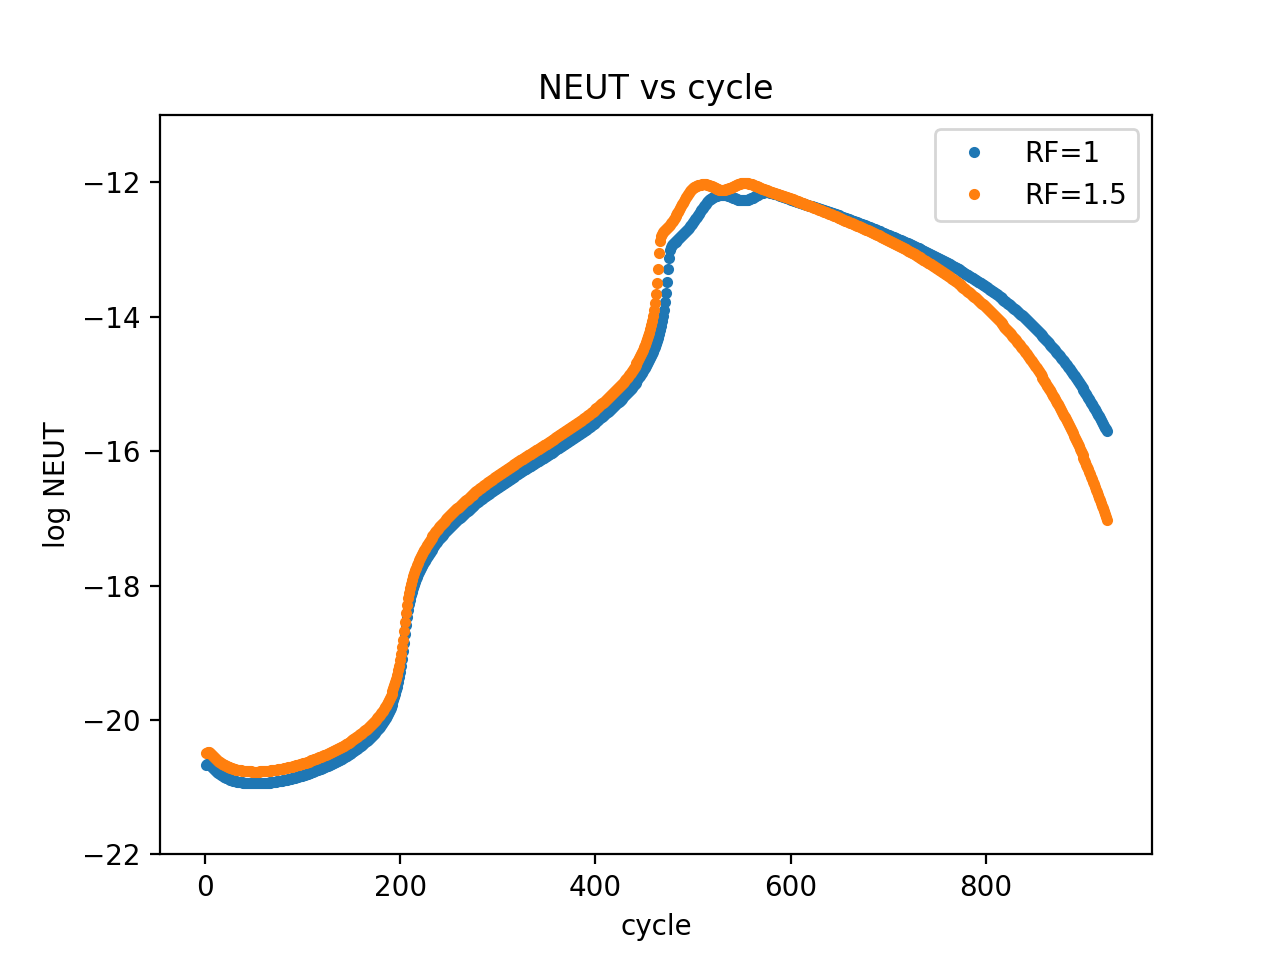

(-22, -11)

In [21]:
#species=['NEUT', 'HE  4','C  13','Ba138']
ifig=1;close(ifig);figure(ifig)
xtime_C13_rf1.plot('cycle','NEUT',legend='RF=1',logy=True)
xtime_C13_rf1p5.plot('cycle','NEUT',legend='RF=1.5',logy=True)
#xtime_C13_rf1.plot('time','BA138',legend='RF=1',logy=True)
#xtime_C13_rf1p5.plot('time','BA138',legend='RF=1.5',logy=True)
ylim(-22,-11)
#xtime_C13_rf1.plot?

##  I choose three different cycles from Fig.1 to investigate the impact of $^{13}C(a,n)^{16}O$ rates on heavey elements.  They are: 1(beginning); 500(peak); 925(biggest difference)

## Analyze the data file and make a ratio for $^{13}C(a,n)^{16}O$ rates with different multiplying factor

In [22]:
Abu_C13_rf1.dcols

['NUM', 'Z', 'A', 'ISOM', 'ABUNDANCE_MF', 'ISOTP']

In [23]:
#==================i is the number of cycle=======================
i=1
j=500
m=925
#================= Read the data of iso_massf####.DAT ============

#======for case of cycle_number = 1 ===================
MF_RF1=Abu_C13_rf1.get('ABUNDANCE_MF',i)
#Ratio=MF_RF1p5/MF_RF1
number_order=Abu_C13_rf1.get('NUM',i)
charge_number=Abu_C13_rf1.get('Z',i)
massnum=number=Abu_C13_rf1.get('A',i)
isomer=Abu_C13_rf1.get('ISOM',i)
elemnt_name=number=Abu_C13_rf1.get('ISOTP',i)

MF_RF1p5=Abu_C13_rf1p5.get('ABUNDANCE_MF',i)

#======for case of cycle_number = 500===================
MF_RF1_500=Abu_C13_rf1.get('ABUNDANCE_MF',j)
#Ratio=MF_RF1p5/MF_RF1
number_order_500=Abu_C13_rf1.get('NUM',j)
charge_number_500=Abu_C13_rf1.get('Z',j)
massnum_500=Abu_C13_rf1.get('A',j)
isomer_500=Abu_C13_rf1.get('ISOM',j)
elemnt_name_500=number=Abu_C13_rf1.get('ISOTP',j)

MF_RF1p5_500=Abu_C13_rf1p5.get('ABUNDANCE_MF',j)

#======for case of cycle_number = 500===================
MF_RF1_925=Abu_C13_rf1.get('ABUNDANCE_MF',m)
#Ratio=MF_RF1p5/MF_RF1
number_order_925=Abu_C13_rf1.get('NUM',m)
charge_number_925=Abu_C13_rf1.get('Z',m)
massnum_925=Abu_C13_rf1.get('A',m)
isomer_925=Abu_C13_rf1.get('ISOM',m)
elemnt_name_925=number=Abu_C13_rf1.get('ISOTP',m)

MF_RF1p5_925=Abu_C13_rf1p5.get('ABUNDANCE_MF',m)

#print MF_RF1p5_925

In [24]:
#============for combine the iso abundance for multiplying factor =1 =======================
#===================CN =1=================
cb_data1_1 = pd.DataFrame()
cb_data1_1['index'] = charge_number
cb_data1_1['value'] = MF_RF1
sss1_1=cb_data1_1.groupby('index').sum()
#======if you plot sss1, directly run the next line=============
#sss1.plot(logy=True)

#===================CN =500=================
cb_data1_500 = pd.DataFrame()
cb_data1_500['index'] = charge_number_500
cb_data1_500['value'] = MF_RF1_500
sss1_1_500=cb_data1_500.groupby('index').sum()

#===================CN =925=================
cb_data1_925 = pd.DataFrame()
cb_data1_925['index'] = charge_number_925
cb_data1_925['value'] = MF_RF1_925
sss1_1_925=cb_data1_925.groupby('index').sum()
#print sss1_1_925

In [25]:
#==============make same iso abundance data for multiplying factor =1.5===============
cb_data1p5_1 = pd.DataFrame()
cb_data1p5_1['index'] = charge_number
cb_data1p5_1['value'] = MF_RF1p5
sss2_1p5=cb_data1p5_1.groupby('index').sum()
#===================CN =500=================
cb_data1p5_500 = pd.DataFrame()
cb_data1p5_500['index'] = charge_number_500
cb_data1p5_500['value'] = MF_RF1p5_500
sss2_1p5_500=cb_data1p5_500.groupby('index').sum()
#===================CN =925=================
cb_data1p5_925 = pd.DataFrame()
cb_data1p5_925['index'] = charge_number_925
cb_data1p5_925['value'] = MF_RF1p5_925
sss2_1p5_925=cb_data1p5_925.groupby('index').sum()
#print cb_data1p5_1

In [26]:
#==================Abun_Ratio_iso plot==============================
#================== store the con
Ratio_bm_1=sss1_1/sss1_1
Ratio_new_1=sss2_1p5/sss1_1

Ratio_bm_500=sss1_1_500/sss1_1_500
Ratio_new_500=sss2_1p5_500/sss1_1_500

Ratio_bm_925=sss1_1_925/sss1_1_925
Ratio_new_925=sss2_1p5_925/sss1_1_925
#========Here we have a simple plot way to plot the figure as showm below. 

#####################
#  Ratio_new.plot() #
#####################

#================However, we use plt also can reproduce it and can easily add the benchline

%rm *.csv

Ratio_bm_1.to_csv('out1.csv')
Ratio_new_1.to_csv('out2.csv')

Ratio_bm_500.to_csv('out1_500.csv')
Ratio_new_500.to_csv('out2_500.csv')

Ratio_bm_925.to_csv('out1_925.csv')
Ratio_new_925.to_csv('out2_925.csv')

<IPython.core.display.Javascript object>


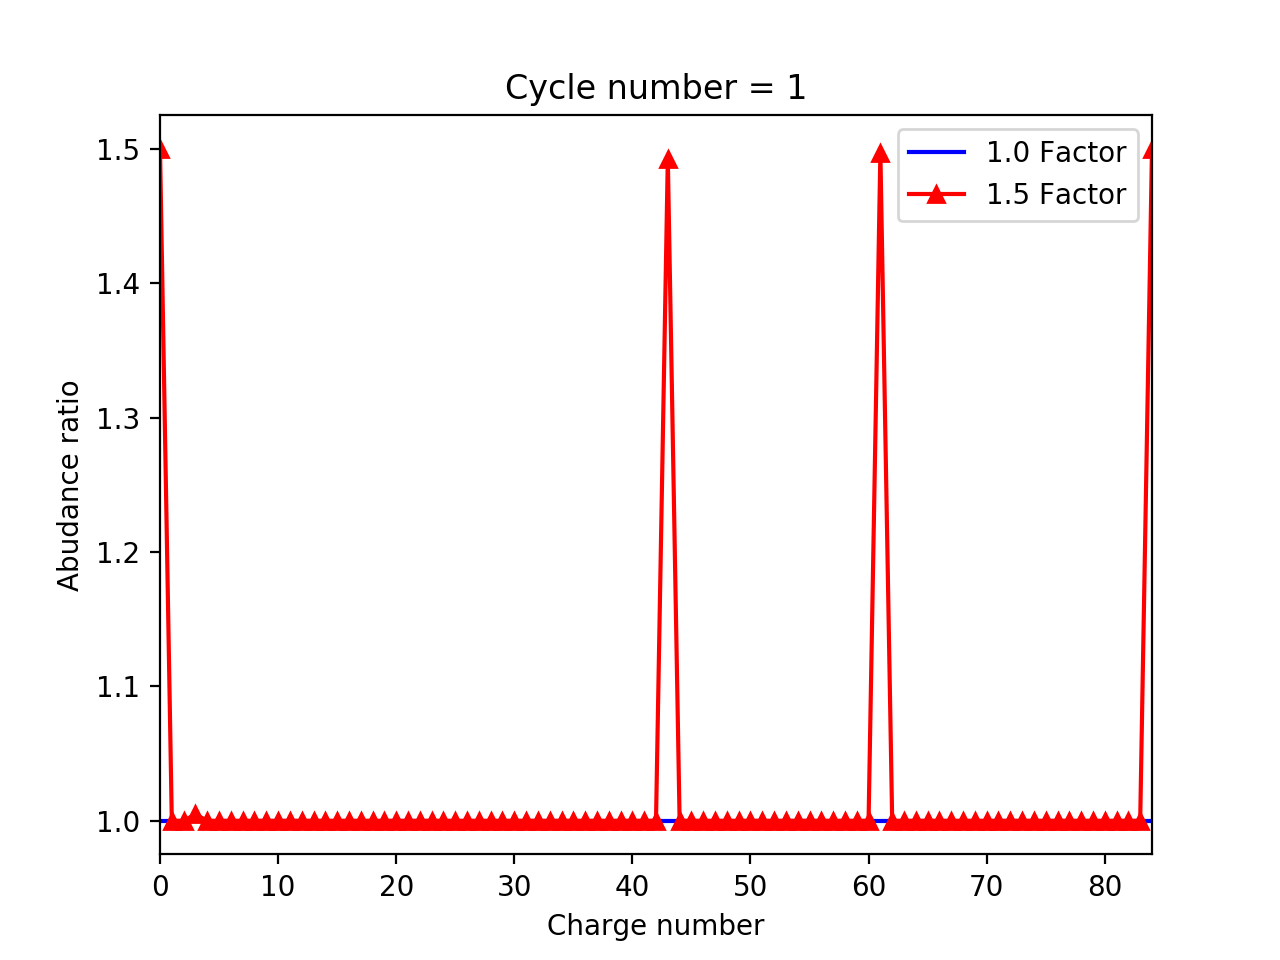

<IPython.core.display.Javascript object>


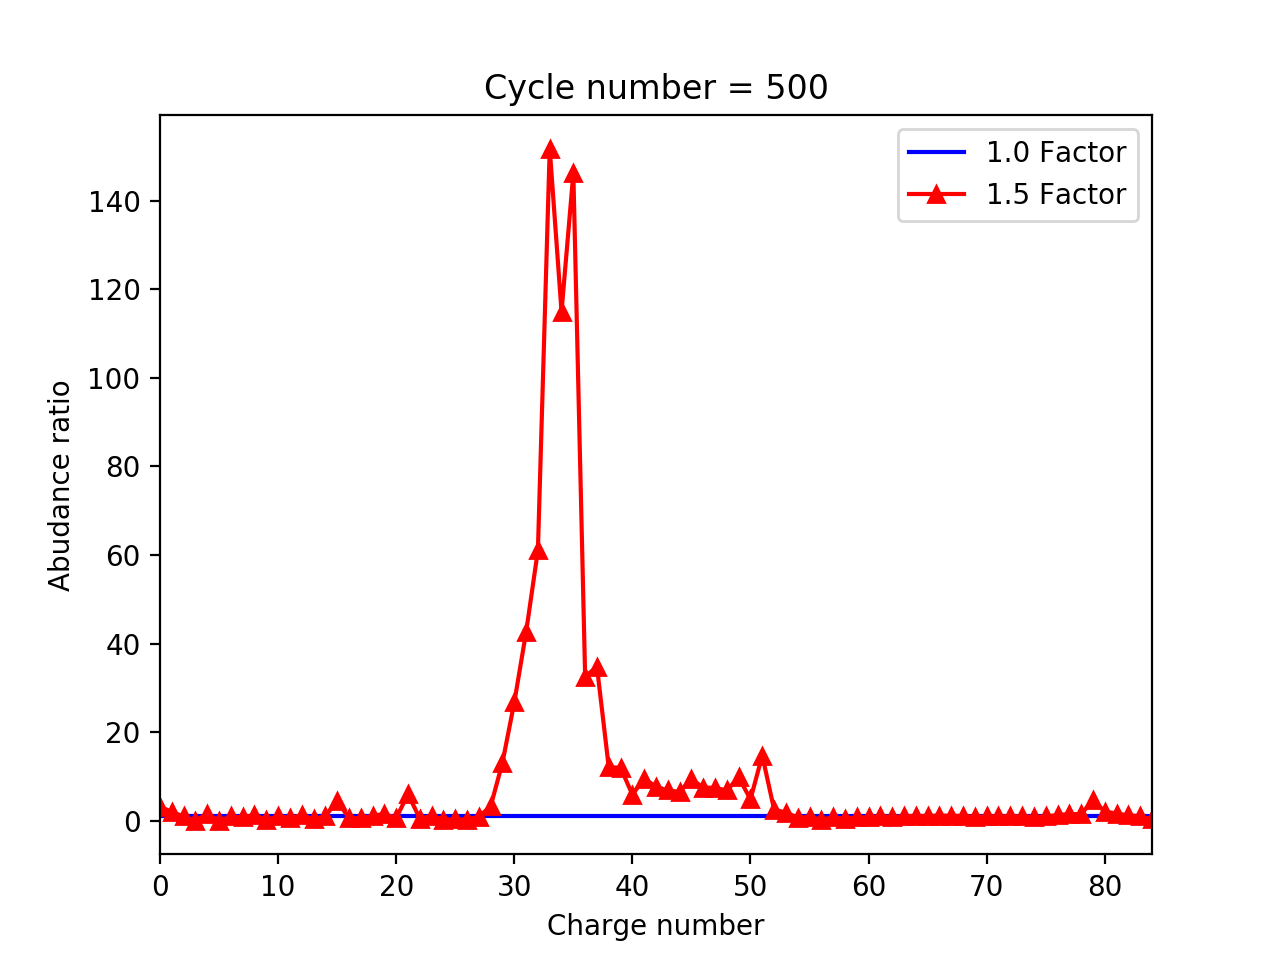

<IPython.core.display.Javascript object>


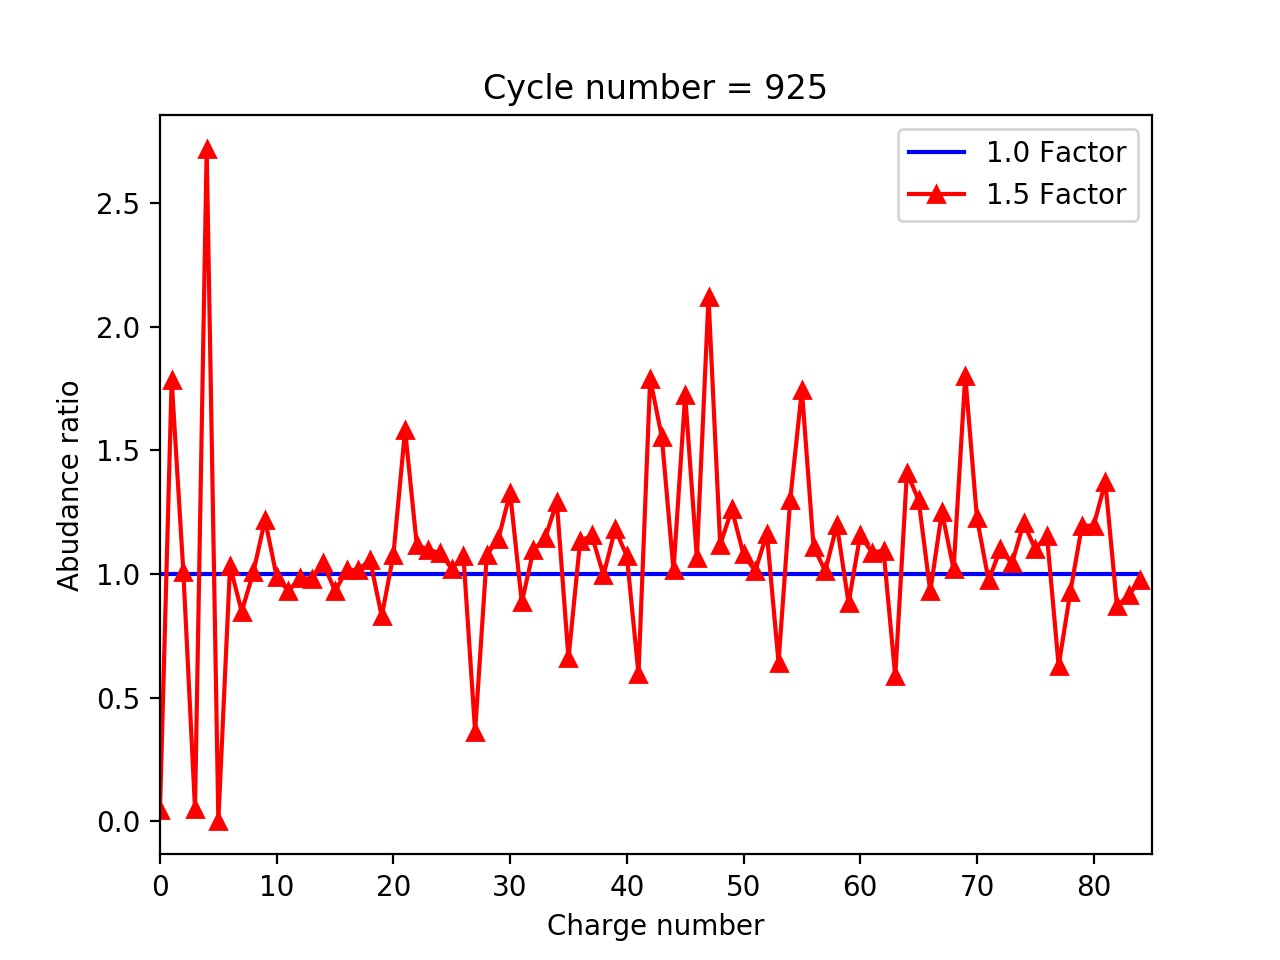

In [27]:
rate1=np.genfromtxt('out1.csv', delimiter=',')
rate2=np.genfromtxt('out2.csv', delimiter=',')

rate1_500=np.genfromtxt('out1_500.csv', delimiter=',')
rate2_500=np.genfromtxt('out2_500.csv', delimiter=',')

rate1_925=np.genfromtxt('out1_925.csv', delimiter=',')
rate2_925=np.genfromtxt('out2_925.csv', delimiter=',')

a1=rate1[:,0]
a2=rate1[:,1]
b1=rate2[:,0]
b2=rate2[:,1]

a1_500=rate1_500[:,0]
a2_500=rate1_500[:,1]
b1_500=rate2_500[:,0]
b2_500=rate2_500[:,1]

a1_925=rate1_925[:,0]
a2_925=rate1_925[:,1]
b1_925=rate2_925[:,0]
b2_925=rate2_925[:,1]

#========plot for case CN=1===========
#ifig=2;close(ifig);figure(ifig)
plt.figure()
plt.plot(a1,a2,'b-',lw=1.5,label='1.0 Factor')
plt.plot( b1,b2,'r^-',lw=1.5,label='1.5 Factor')
xlim(0,84)
plt.xlabel('Charge number')
plt.ylabel('Abudance ratio')
plt.title('Cycle number = 1')
plt.legend()


#========plot for case CN=1===========
#ifig=3;close(ifig);figure(ifig)
plt.figure()
plt.plot(a1_500,a2_500,'b-',lw=1.5,label='1.0 Factor')
plt.plot( b1_500,b2_500,'r^-',lw=1.5,label='1.5 Factor')
xlim(0,84)
plt.xlabel('Charge number')
plt.ylabel('Abudance ratio')
plt.title('Cycle number = 500')
plt.legend()

#========plot for case CN=1===========
#ifig=4;close(ifig);figure(ifig)
plt.figure()
plt.plot(a1_925,a2_925,'b-',lw=1.5,label='1.0 Factor')
plt.plot( b1_925,b2_925,'r^-',lw=1.5,label='1.5 Factor')
xlim(0,85)
plt.xlabel('Charge number')
plt.ylabel('Abudance ratio')
plt.title('Cycle number = 925')
plt.legend()

#plt.plot?


## Next step: 
From source code I learn that the trajectory used in above calculation is the defaults:     

$$T9 = 0.1$$               
$$RHO = 1.0D3 $$           

In following step, I want to choose a non-constant trajectory to investigate its effects.


In [15]:
#xtime_C13_rf1.abu_profile()
#xtime_C13_rf1.cols
xtime_C13_rf1.get('time','cycle')

TypeError: get() takes 2 positional arguments but 3 were given

In [23]:
#aq=array(ones((1,len(charge_number))))
#print aq

[[ 1.  1.  1. ...,  1.  1.  1.]]


# plot abundance chart 

In [3]:
#ifig=1;figure(ifig); close(ifig)
#Abu_C13_rf1.abu_chart(26)

# Plot iso_abundance 

In [4]:
#ifig=2;figure(ifig); close(ifig)
#Abu_C13_rf1.iso_abund(0)

In [104]:
#============used to create a acsii file as a input file ===========

#Ratio_data=[number_order,charge_number,massnum,isomer,Ratio,elemnt_name]
#hd=['NUM Z A ISOM ABUNDANCE_MF ISOTP']
#dcols=['','','','','','']
#outfile= 'iso_massf00001.DAT'
#%rm iso_massf00001.DAT
#at.write(outfile,hd,dcols,Ratio_data)
#at.write?
#number_order
#!cat iso_massf00001.DAT